# Phosphorylation and Dephosphorylation

#### Author(s):  Stanley Wang
#### Reference: [Tyson et al (2003)](http://www.sciencedirect.com/science/article/pii/S0955067403000176) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/phosphorilation-dephosphorilation.cpi)

A model of a simple phosphorylation and dephosphorylation reaction. This is the 2nd model from the Tyson et al (2003) paper.

Species R has a reaction site at a and reacts on a to produce RP - the phosphorylated form of R. Signal S has a reaction site at b and reacts on b before returning to its original state. We define a communication channel between sites a and b in the global affinity network allowing the two sites to react at a rate of 1.0 as specified by Tyson et al. (2003). Species RP has no reaction sites but a spontaneous reaction allows it to change back to R - the dephosphorylated form of R P . Version A of the code shows the translation of the model into Continuous-π Calculus.

However, due to a bug in the Cπ-IDE, version A crashes while generating ODEs for this system of equations (and hence it is commented out in the code). At this point in time, the exact details of the bug have not been confirmed but one hypothesis outlines a situation where an infinite loop of parallel compositions can occur. An alternative approach was implemented that bypassed this problem. Version B displays this alternative implementation.

Species R has a reaction site at a where it waits for signal r. Once a signal has been re- ceived it reacts on t to form RP. To ensure that the complex formed is almost instantly converted into RP we set the reaction rate for the forward reaction to a large value such as 1000. This significant difference ensures that the complex will only be formed for a split second before disintegrating into RP. Species S has a reaction site at b, after which it can react further on site r to return back to the original species. The remaining portion of the implementation remains the same.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import singleSimulate

In [3]:
cpi_model = singleSimulate.Simulate('phosphorilation-dephosphorilation')

Select the model: phosphorilation-dephosphorilation
The processes in this cpi model are:
P


## Code

In [5]:
ode_def = cpi_model.view_processdef('P')

The cpi definitions of selected file are:

-- Phosphorylation and Dephosphorylation - version A (not working)



-- species R(a) = a.RP(a);

-- species S(b) = b.S(b);

-- species RP(a) = tau < 1 > .R(a);

-- process P = [1] S(b) || [1] R(a) || [0] RP(a): { a − b@1 } ;



-- Phosphorylation and Dephosphorylation - version B (with the workaround)



species R(a) = { t - r@1000 } a < r > .t.Rp(a);

species S(b) = b(r).r.S(b);

species Rp(a) = tau < 1 > .R(a);

process P = [1] S(b) || [1] R(a) || [0] Rp(a): { a - b@1 } ;


## Plot

Time Start: 0.0, Time End: 10.0, Number of Times: 100.


<IPython.core.display.Javascript object>


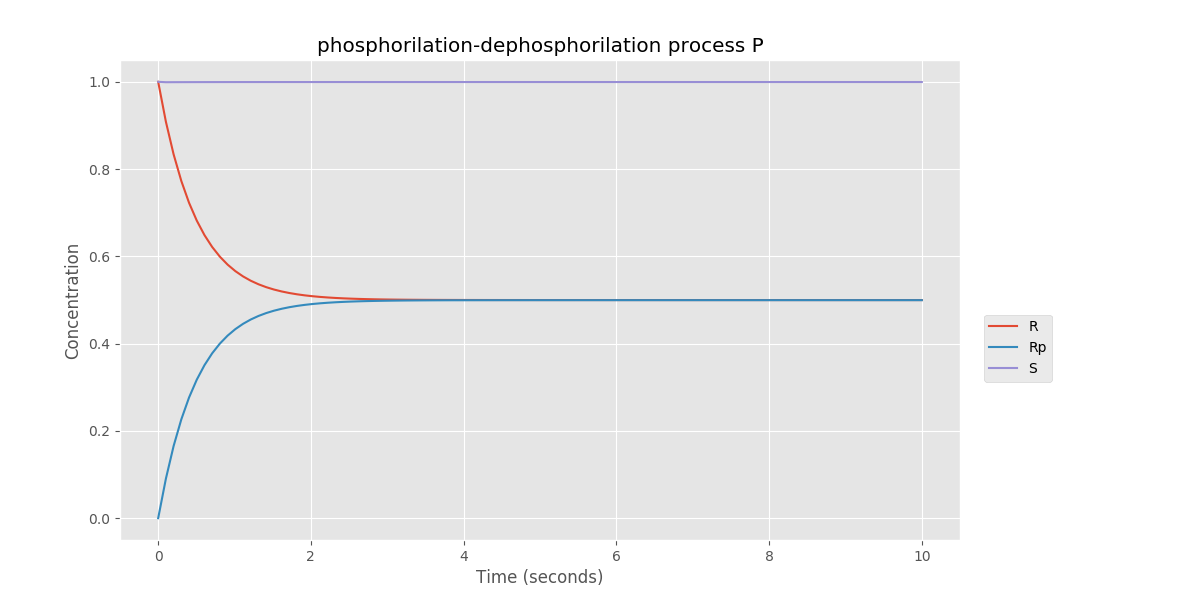

Picture will not be saved or you can change your selection.


In [6]:
times, solution = cpi_model.simulate_process('P','odeint', 0, 10, 100)
plot1 = cpi_model.show_plot('P',times, solution)